In [1]:
from util import *
from preprocess import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as tt


In [2]:
dataset_name = 'character'

if 'char' in dataset_name.lower():
  print('char')

elif any(map(lambda x: x in dataset_name.lower(), ['img', 'image', 'test'])):
  print('img')

char


In [3]:
char_set = load_dataset('char')

In [4]:
img = next(iter(char_set))[0]

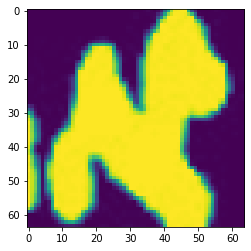

In [5]:
plt.imshow(img[0,:,:])
# print(WordAugmenter().policies)

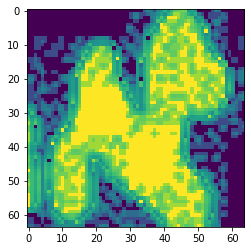

In [6]:
trans = tt.Compose([
  tt.ToPILImage(),
  tt.AutoAugment(),
  tt.ToTensor()
])

plt.imshow(trans(img)[0,:,:])

In [7]:
cwg = iter(CorruptWordGen(load_dataset('char', equal_shapes=False), char_size=64, max_iter=20000, shuffle=True, num_workers=0, pin_memory=True))
base_word, crpt_word, label = cwg.gen_words(1)

# plt.imshow(crpt_word[0,:,:])

# print(f"output prop: {64 / (64 * (2 + 10) / 3)}\n img prop: {word.shape[1] / word.shape[2]}")

gen word shape: torch.Size([1, 64, 193])
<class 'torch.Tensor'>
word augmenter transforms: [ToPILImage(), RandomAffine(degrees=[0.0, 0.0], scale=(0.7, 1)), RandomPerspective(p=1), ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]
to be augmented word shape: torch.Size([64, 256])


In [8]:
gen = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(64**2, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 1 x 64 x 64
  )

In [9]:
# N = 10000
# c = 0

# for i in range(N):
#   c += cwg.gen_words(1)[1][0] > 0
#   if i % 1000 == 0:
#     iter(cwg)
  
# print(c/N)

torch.Size([1, 64, 256])
word augmenter transforms: [RandomCorrupt(), ToPILImage(), RandomAffine(degrees=[0.0, 0.0], shear=[-10.0, 10.0, -10.0, 10.0]), RandomAffine(degrees=[-8.0, 8.0]), ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]
to be augmented word shape: torch.Size([1, 64, 256])


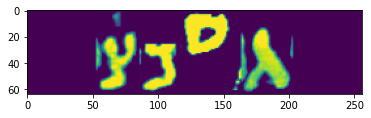

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(1.))
pre-range: (tensor(-3.0000), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(1.))


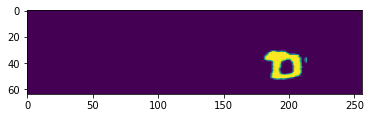

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(1.))
pre-range: (tensor(-3.), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(1.))


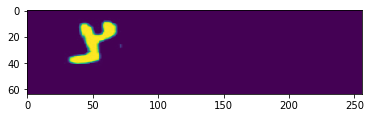

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(1.))
pre-range: (tensor(-2.9998), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(1.))


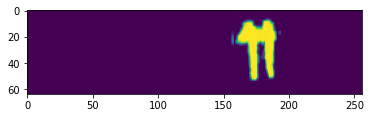

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(0.9968))
pre-range: (tensor(-2.9968), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(0.9968))


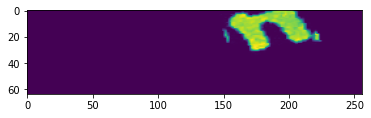

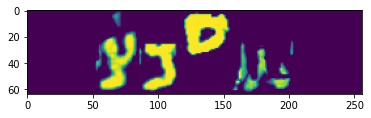

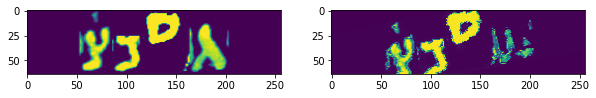

In [27]:
trans = tt.Compose([
  tt.ToPILImage(),
  tt.RandomAffine(0, scale=(0.7, 1)),
  tt.RandomPerspective(p=1, distortion_scale=0.2),
  tt.RandomAffine(0, shear=(-10, 10, -10, 10)),
  tt.RandomAffine(8),
  tt.RandomAffine(0, translate=(0.1, 0.3)),
  tt.RandomAffine(0, scale=(1, 1.3)),
  # tt.ColorJitter(contrast=.5),
  tt.ToTensor()
])

wa = WordAugmenter()

print(base_word.shape)
forw = wa.forward(base_word).detach().numpy()

fig, axes = plt.subplots(1, 2, figsize=(10, 20))
axes[0].imshow(base_word[0,:,:])
axes[1].imshow(forw[0,:,:])
plt.show()

gen word shape: torch.Size([1, 62, 145])
<class 'torch.Tensor'>
word augmenter transforms: [ToPILImage(), RandomAffine(degrees=[0.0, 0.0], scale=(0.7, 1)), ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]
to be augmented word shape: torch.Size([64, 256])


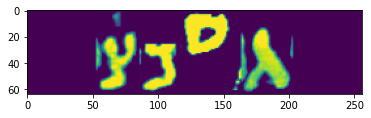

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(1.))
pre-range: (tensor(-3.), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(1.))


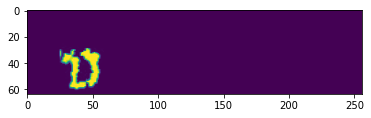

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(0.9998))
pre-range: (tensor(-2.9998), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(0.9998))


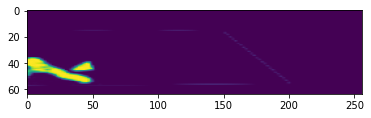

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(0.7776))
pre-range: (tensor(-2.7697), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(0.7776))


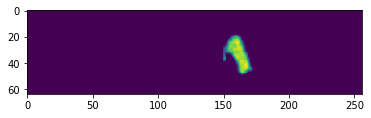

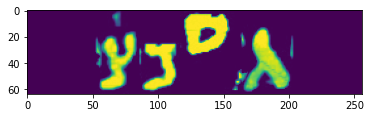

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [13]:
base_word, crpt_word, label = cwg.gen_words(1)
rc = RandomCorrupt(load_dataset('char', equal_shapes=False))
rc.forward(base_word)

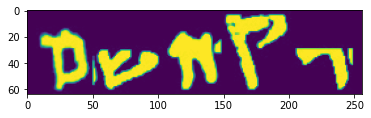

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(0.9990))
pre-range: (tensor(-2.9954), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(0.9990))


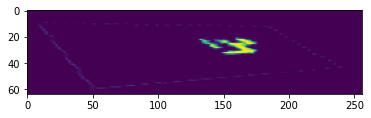

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(1.))
pre-range: (tensor(-3.), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(1.))


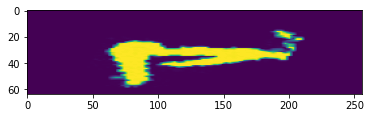

input shape: torch.Size([1, 64, 256])
img 1 range: (tensor(-1.), tensor(1.))
img 2 range: (tensor(-1.), tensor(0.8116))
pre-range: (tensor(-2.8116), tensor(1.))
post-range: (tensor(-1.), tensor(1.))
subtracted word range: (tensor(-1.), tensor(1.))
 subtracting char range: (tensor(-1.), tensor(0.8116))


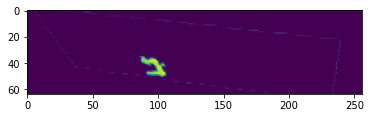

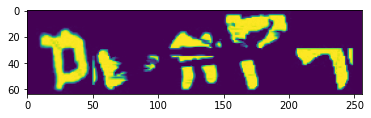

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [12]:
rc.forward(base_word)